## 🚩 Going down stairs :
| 1 | **- 🧹 [Data Cleaning](#1--🧹-data-cleaning)**                    |
|:-:|------------------------------------------ |
| 2 | **- 👨‍🔧 [Feature Enginner and Selecting](#2--👨‍🔧🛠-feature-enginner-and-selecting)** |
| 3 | **- 📊 [Visualization](#3---📊-visualization)**                    |
| 4 | **- 🥵 [Heat Map](#4---🥵-heat-map)**                         |
| 5 | **- 🎢 [Varience ThresHold](#5---🎢-variance-threshold)**               |
| 6 | **- 🎯 [SMOTE { KNN }](#6---🎯-smote--knn)**                            |
| 7 | **- 🚅 [Train](#7---🚅-train)**                            |
| 8 | **- 🐇 [observations](#7---🚅-train) 🎆**                            |


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

import warnings
warnings.filterwarnings('ignore')

## 1- 🧹 [Data Cleaning](#1--🧹-data-cleaning)

In [ ]:
# Load the xlsx file
excel_data = pd.read_excel("Data/Personal Bank Loan Classification.xlsx",sheet_name='Data')
# Read the values of the file in the dataframe
df = pd.DataFrame(excel_data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
df['Experience'] = df["Experience"].apply(lambda x: 0 if x < 0 else x)
print(df['Experience'].min())

0


## 2- 👨‍🔧🛠 Feature Enginner and Selecting

In [ ]:
df.drop('ID',axis=1,inplace=True)

In [ ]:
# for i in df.columns:
#     p = so.Plot(df[i])
#     p2 = p.add(so.Bars(alpha=.3), so.Hist("density"))
#     p2.add(so.Line(), so.KDE())
#     p2.show()

*NORMMM!!!!*
- standerd scaler OR min-max => { Age, Experiecne }

- log + min-max => { income, CCAvg }

- min-max => { zip code, mortage  }

**---- lets test ---->>>> all from 0 to 1**

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
minMax = MinMaxScaler()
scaler = StandardScaler()

In [ ]:
minMax.fit(df[['Experience','Age']])
df[['EXP_NORM','AGE_NORM']] = minMax.transform(df[['Experience','Age']])

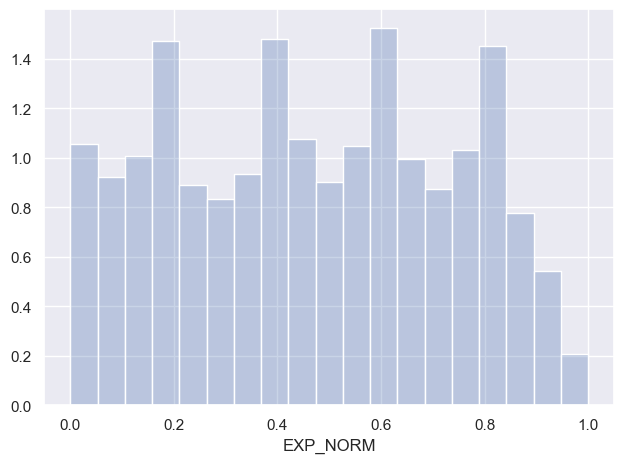

In [ ]:
p = so.Plot(df['EXP_NORM'])
p2 = p.add(so.Bars(alpha=.3), so.Hist("density"))
p2.add(so.Line(), so.KDE())
p2.show()

In [ ]:
df[['NORM_Income','NORM_CCAvg']] = np.log(df[['Income','CCAvg']] + 1)
minMax.fit(df[['NORM_Income','NORM_CCAvg']])

df[['NORM_Income','NORM_CCAvg']] = minMax.transform(df[['NORM_Income','NORM_CCAvg']])

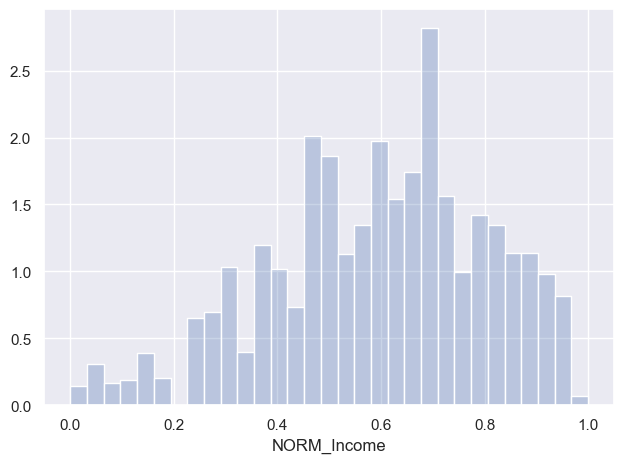

In [ ]:
p = so.Plot(df['NORM_Income'])
p2 = p.add(so.Bars(alpha=.3), so.Hist("density"))
p2.add(so.Line(), so.KDE())
p2.show()

In [ ]:
minMax.fit(df[['Mortgage','ZIP Code']])

# df[['NORM_Mortgage','NORM_ZIP_Code']] = minMax.transform(df[['Mortgage','ZIP Code']])
df[['NORM_Mortgage','NORM_ZIP_Code']] = (df[['Mortgage','ZIP Code']]) / df[['Mortgage','ZIP Code']].max()


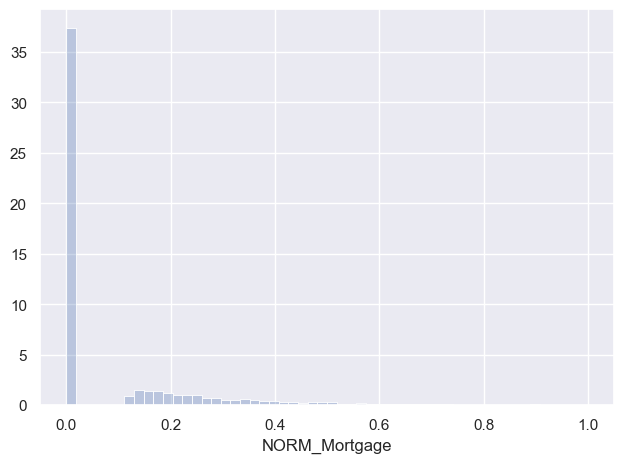

In [ ]:
p = so.Plot(df['NORM_Mortgage'])
p2 = p.add(so.Bars(alpha=.3), so.Hist("density"))
p2.add(so.Line(), so.KDE())
p2.show()

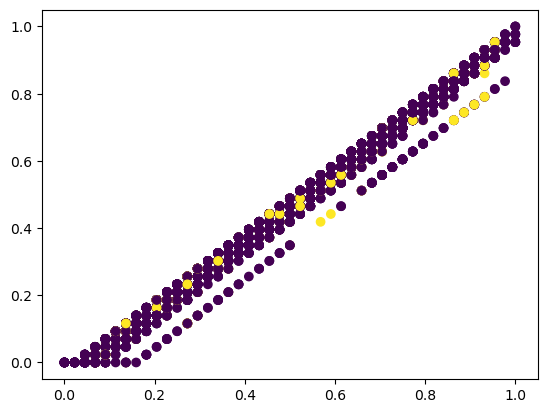

In [ ]:
plt.scatter(x=df['AGE_NORM'], y=df['EXP_NORM'],c=df['Personal Loan'])
plt.show()

In [ ]:
df['Age_Phase_Experience'] = df['AGE_NORM'] * df['EXP_NORM']



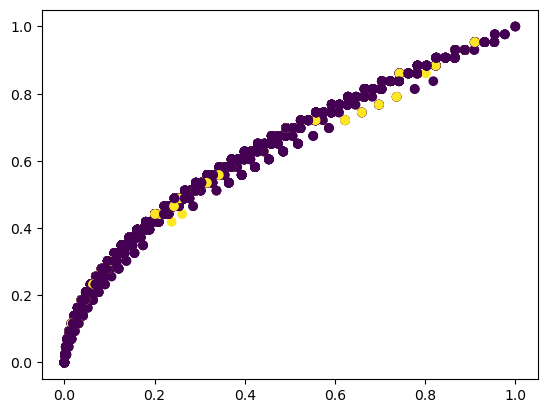

In [ ]:
plt.scatter(x=df['Age_Phase_Experience'], y=df['EXP_NORM'],c=df['Personal Loan'])
plt.show()

   ## 3 - 📊 Visualization

In [ ]:
print(df['Personal Loan'].value_counts())
100 - (df[df['Personal Loan'] == 1]['Personal Loan'].sum() / 5000 * 100)

0    4520
1     480
Name: Personal Loan, dtype: int64


90.4

### ***90.4%* of people not except the loan that Impalanced data need to have a solustion ❗❗❗❗**

### there are three solution that i know until now:


#### 1 - Choose Proper Evaluation matrix :-
The accuracy of a classifier is the total number of correct predictions by the classifier divided by the total number of predictions.<br> This may be good enough for a well-balanced class but not ideal for the imbalanced class problem.<br> The other metrics such as precision is the measure of how accurate the classifier’s prediction of a specific class and recall <br>is the measure of the classifier’s ability to identify a class.

#### 2 - ReSample The Data :-
**This technique is used to upsample or downsample the minority or majority class.<br>**
**When we are using an imbalanced dataset, we can oversample the minority class using replacement.<br>**
**This technique is called oversampling.<br>**
**Similarly, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling.<br>**
**After sampling the data we can get a balanced dataset for both majority and minority classes.<br>**
**So, when both classes have a similar number of records present in the dataset,<br>**
**we can assume that the classifier will give equal importance to both classes.**

#### 3 - SMOTE :-
**Synthetic Minority Oversampling Technique** or **SMOTE** is another technique to oversample the minority class.<br>
Simply adding duplicate records of minority class often don’t add any new information to the model.<br>
In SMOTE new instances are synthesized from the existing data. <br>
If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor,<br> and a synthetic instance is created randomly in feature space..

### we will use SMOTE  🎯

In [ ]:
# col_cat = df[['Family','Education','Securities Account','CD Account','Online','CreditCard']]

# for i in col_cat.columns:
#     sns.countplot(x=i, data = df,color = "seagreen",hue = df['Personal Loan'])
#     plt.show()

## 4 - 🥵 Heat Map

<Axes: >

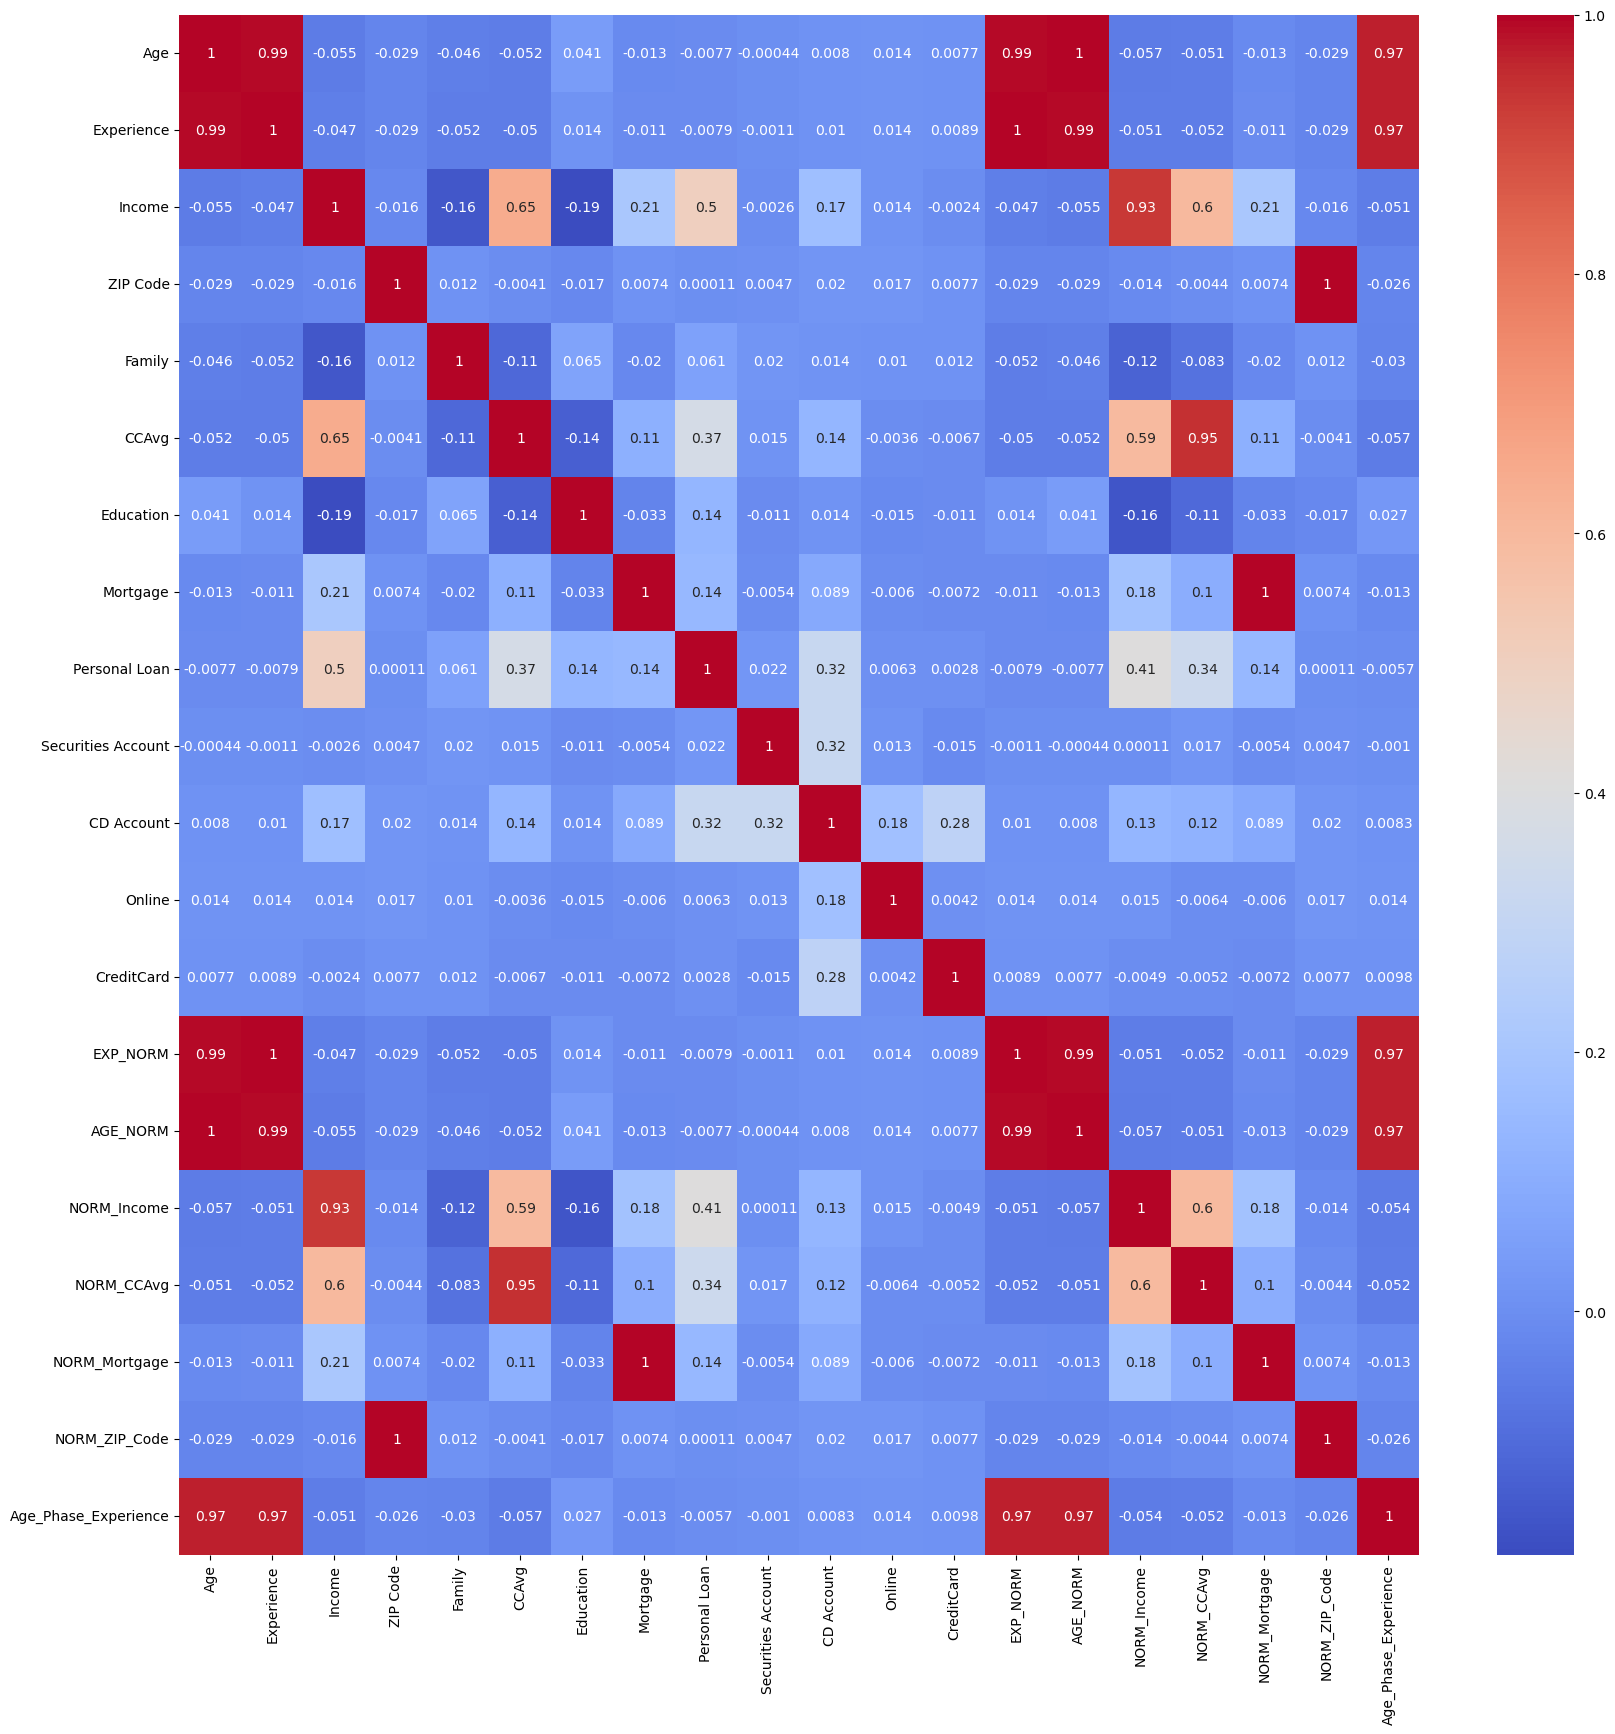

In [ ]:
corr = df.corr()
plt.figure(figsize=(df.shape[1],df.shape[1]))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [ ]:
tt = corr['Personal Loan'].mean() * corr['Personal Loan'].std()

corr[ (corr['Personal Loan'] >= tt) | (corr['Personal Loan'] <= -1*tt) ]['Personal Loan'].index

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan',
       'CD Account', 'NORM_Income', 'NORM_CCAvg', 'NORM_Mortgage'],
      dtype='object')

In [ ]:
df_corr = df[['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan',
       'CD Account', 'NORM_Income', 'NORM_CCAvg', 'NORM_Mortgage']]

In [ ]:
df_2Fet = df[['Income','CCAvg', 'Personal Loan']]

## 5 - 🎢 Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selctor = VarianceThreshold(threshold=0.1)
selctor.fit_transform(df)
selctor.get_feature_names_out()

array(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Online', 'CreditCard'], dtype=object)

In [ ]:
df_var = df[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Online', 'CreditCard','Personal Loan']]

## 6 - 🎯 SMOTE { KNN }

In [ ]:
from collections import Counter
Counter(df['Personal Loan'])

Counter({0: 4520, 1: 480})

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_sm, y_sm = sm.fit_resample(df.drop(['Personal Loan'],axis=1), df['Personal Loan'])

In [ ]:
Counter(y_sm)

Counter({0: 4520, 1: 4520})

In [ ]:
df_sm = x_sm
df_sm['Personal Loan'] = y_sm

In [ ]:
corr_sm = df_sm.corr()

In [ ]:
tt = corr_sm['Personal Loan'].mean() * corr_sm['Personal Loan'].std()

corr_sm[ (corr_sm['Personal Loan'] >= tt) | (corr_sm['Personal Loan'] <= -1*tt) ]['Personal Loan'].index

Index(['Income', 'CCAvg', 'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'NORM_Income', 'NORM_CCAvg',
       'NORM_Mortgage', 'Personal Loan'],
      dtype='object')

In [ ]:
df_sm_corr = df_sm[['Income', 'CCAvg', 'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'NORM_Income', 'NORM_CCAvg',
       'NORM_Mortgage', 'Personal Loan']]

## 7 - 🚅 Train

> We have already a 6 data set <br>

1. df
 - 1.1. df_corr
 - 1.2 - df_var
 - 1.3 - df_2Fet
2. df_sm
 - 2.1 - df_sm_corr


In [ ]:
# import the models that i will use
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

gnb = GaussianNB()
lg = LogisticRegression(max_iter = 2000)
tree = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=1)
svc = SVC(probability = True)
xgb = XGBClassifier(random_state=1)
model = [gnb,lg,tree,knn,rf,svc,xgb]

In [ ]:
def badBunny(df,model):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['Personal Loan'],axis=1), df['Personal Loan'], test_size=0.3, random_state=42)
    print("----------------------------------------------------------------------------------")
    print("first the cross validation")
    print("----------------------------------------------------------------------------------")

    for i in model:
        cv = cross_val_score(i,X_train,y_train,cv = 5)
        model_name = type(i).__name__
        print('name : ' + model_name)
        print(cv.mean())
        print('################')
    print("----------------------------------------------------------------------------------")
    print("second the accuracy for predict")
    print("----------------------------------------------------------------------------------")

    for i in model:
        i.fit(X_train,y_train)
        y_pred_t = i.predict(X_train)
        y_pred_s = i.predict(X_test)
        model_name = type(i).__name__
        print('name : ' + model_name)
        accuracy_t = accuracy_score(y_train, y_pred_t)
        print(f"Accuracy for train: {accuracy_t:.2f}")
        accuracy_s = accuracy_score(y_test, y_pred_s)
        print(f"Accuracy for test: {accuracy_s:.2f}")
        print("+++++++++++++++++==================+++++++++++++++++")


## 1️⃣ df

In [ ]:
badBunny(df,model)

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.8879999999999999
################
name : LogisticRegression
0.9225714285714286
################
name : DecisionTreeClassifier
0.9794285714285715
################
name : KNeighborsClassifier
0.9054285714285715
################
name : RandomForestClassifier
0.9842857142857142
################
name : SVC
0.9077142857142857
################
name : XGBClassifier
0.9828571428571429
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.89
Accuracy for test: 0.89
+++++++++++++++++==================+++++++++++++++++
name : LogisticRegression
Accuracy for train: 0.91
Accuracy for test: 0.9

|   **model**  	| **Train Accuracy** 	| **Test Accuracy** 	|
|:------------:	|:------------------:	|:-----------------:	|
| **Gaussian** 	|         89%        	|        89%        	|
| **Logistic** 	|         91%        	|        90%        	|
|   **Tree**   	|        100%        	|        98%        	|
|    **KNN**   	|         93%        	|        90%        	|
|  **Forest**  	|        100%        	|        99%        	|
|    **SVM**   	|         91%        	|        90%        	|
|    **XGB**   	|        100%        	|        99%        	|

## 2️⃣ df_2Fet

In [ ]:
badBunny(df_2Fet,model)

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.8911428571428572
################
name : LogisticRegression
0.9088571428571429
################
name : DecisionTreeClassifier
0.9119999999999999
################
name : KNeighborsClassifier
0.9071428571428571
################
name : RandomForestClassifier
0.9185714285714285
################
name : SVC
0.9077142857142857
################
name : XGBClassifier
0.9205714285714286
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.89
Accuracy for test: 0.89
+++++++++++++++++==================+++++++++++++++++
name : LogisticRegression
Accuracy for train: 0.91
Accuracy for test: 0.9

|   **model**  	| **Train Accuracy** 	| **Test Accuracy** 	|
|:------------:	|:------------------:	|:-----------------:	|
| **Gaussian** 	|         89%        	|        89%        	|
| **Logistic** 	|         91%        	|        90%        	|
|   **Tree**   	|         99%        	|        91%        	|
|    **KNN**   	|         94%        	|        90%        	|
|  **Forest**  	|         99%        	|        92%        	|
|    **SVM**   	|         91%        	|        90%        	|
|    **XGB**   	|         98%        	|        92%        	|

## 3️⃣ df_corr

In [ ]:
badBunny(df_corr,model)

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.8865714285714285
################
name : LogisticRegression
0.9471428571428572
################
name : DecisionTreeClassifier
0.9785714285714284
################
name : KNeighborsClassifier
0.9268571428571428
################
name : RandomForestClassifier
0.9842857142857143
################
name : SVC
0.9085714285714286
################
name : XGBClassifier
0.9825714285714285
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.89
Accuracy for test: 0.89
+++++++++++++++++==================+++++++++++++++++
name : LogisticRegression
Accuracy for train: 0.95
Accuracy for test: 0.9

|   **model**  	| **Train Accuracy** 	| **Test Accuracy** 	|
|:------------:	|:------------------:	|:-----------------:	|
| **Gaussian** 	|         89%        	|        89%        	|
| **Logistic** 	|         95%        	|        94%        	|
|   **Tree**   	|        100%        	|        98%        	|
|    **KNN**   	|         95%        	|        93%        	|
|  **Forest**  	|        100%        	|        99%        	|
|    **SVM**   	|         91%        	|        90%        	|
|    **XGB**   	|        100%        	|        99%        	|

## 4️⃣ df_var

In [ ]:
badBunny(df_var,model)

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.9008571428571429
################
name : LogisticRegression
0.9182857142857144
################
name : DecisionTreeClassifier
0.9788571428571429
################
name : KNeighborsClassifier
0.9054285714285715
################
name : RandomForestClassifier
0.982
################
name : SVC
0.9077142857142857
################
name : XGBClassifier
0.9817142857142857
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.90
Accuracy for test: 0.90
+++++++++++++++++==================+++++++++++++++++
name : LogisticRegression
Accuracy for train: 0.91
Accuracy for test: 0.90
+++++++++++

|   **model**  	| **Train Accuracy** 	| **Test Accuracy** 	|
|:------------:	|:------------------:	|:-----------------:	|
| **Gaussian** 	|         90%        	|        90%        	|
| **Logistic** 	|         91%        	|        90%        	|
|   **Tree**   	|        100%        	|        98%        	|
|    **KNN**   	|         93%        	|        90%        	|
|  **Forest**  	|        100%        	|        99%        	|
|    **SVM**   	|         91%        	|        90%        	|
|    **XGB**   	|        100%        	|        99%        	|

## 5️⃣ df_sm

In [ ]:
badBunny(df_sm,model)

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.8947553840486048
################
name : LogisticRegression
0.8767414095623451
################
name : DecisionTreeClassifier
0.9625475026381682
################
name : KNeighborsClassifier
0.9032861897358085
################
name : RandomForestClassifier
0.9789821978282724
################
name : SVC
0.5042667765643245
################
name : XGBClassifier
0.980878182192833
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.89
Accuracy for test: 0.90
+++++++++++++++++==================+++++++++++++++++
name : LogisticRegression
Accuracy for train: 0.88
Accuracy for test: 0.88

|   **model**  	| **Train Accuracy** 	| **Test Accuracy** 	|
|:------------:	|:------------------:	|:-----------------:	|
| **Gaussian** 	|         89%        	|        90%        	|
| **Logistic** 	|         88%        	|        88%        	|
|   **Tree**   	|        100%        	|        97%        	|
|    **KNN**   	|         93%        	|        91%        	|
|  **Forest**  	|        100%        	|        98%        	|
|    **SVM**   	|         50%        	|        49%        	|
|    **XGB**   	|        100%        	|        99%        	|

## 6️⃣ df_sm_corr

In [ ]:
badBunny(df_sm_corr,model)

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.8941222236791987
################
name : LogisticRegression
0.902497299389943
################
name : DecisionTreeClassifier
0.9348932556556706
################
name : KNeighborsClassifier
0.9059754353758063
################
name : RandomForestClassifier
0.9535405153950384
################
name : SVC
0.8846404286008654
################
name : XGBClassifier
0.9713975110678181
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.89
Accuracy for test: 0.90
+++++++++++++++++==================+++++++++++++++++
name : LogisticRegression
Accuracy for train: 0.90
Accuracy for test: 0.90

|   **model**  	| **Train Accuracy** 	| **Test Accuracy** 	|
|:------------:	|:------------------:	|:-----------------:	|
| **Gaussian** 	|         89%        	|        90%        	|
| **Logistic** 	|         90%        	|        90%        	|
|   **Tree**   	|        100%        	|        95%        	|
|    **KNN**   	|         94%        	|        91%        	|
|  **Forest**  	|        100%        	|        96%        	|
|    **SVM**   	|         89%        	|        89%        	|
|    **XGB**   	|        100%        	|        98%        	|

In [ ]:
m, n = df_sm_corr.shape
print(m,n)

9040 12


In [ ]:
df_sm_corr.head()

,Income,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,NORM_Income,NORM_CCAvg,NORM_Mortgage,Personal Loan
0,49,1.6,1,0,1,0,0,0,0.532732,0.398479,0.0,0
1,34,1.5,1,0,1,0,0,0,0.421925,0.382123,0.0,0
2,11,1.0,1,0,0,0,0,0,0.089373,0.289065,0.0,0
3,100,2.7,2,0,0,0,0,0,0.751162,0.545617,0.0,0
4,45,1.0,2,0,0,0,0,1,0.506828,0.289065,0.0,0


#### ✨✨data set best choise until now is the **DataFrame** who has ***SMOT*** generize more accurate✨✨

In [ ]:
def init_param():
    w1 = np.random.rand(255,11) - 0.5
    b1 = np.random.rand(255,1) - 0.5
    w2 = np.random.rand(2,255) - 0.5
    b2 = np.random.rand(2,1) - 0.5
    return w1, b1, w2, b2

def ReLU(z):
    return np.maximum(0,z)

def deriv_ReLU(z):
    return z > 0

def SoftMax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(w1,b1,w2,b2,x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = SoftMax(z2)
    return z1, a1, z2, a2

def one_hot(y):
    one_hot_y = np.zeros(( y.size, y.max()+1 ))
    one_hot_y[np.arange(y.size),y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def backward_prop(z1, a1, z2, a2, w2, x, y):
    one_hot_y = one_hot(y)

    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)

    dz1 = w2.T.dot(dz2) * deriv_ReLU(z1)
    dw1 = 1/m * dz1.dot(x.T)
    db1 = 1/m * np.sum(dz1)

    return dw1, db1, dw2, db2

def update(w1,b1,w2,b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    w2 = w2 - alpha * dw2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

def get_predictions(a):
    return np.argmax(a,0)

def get_accuracy(a,y):
    return np.sum(a == y) / y.size

def gradint_descent(x,y,iterations, alpha):
    w1, b1, w2, b2 = init_param()
    for i in range(iterations):
        z1, a1, z2, a2  = forward_prop(w1, b1, w2, b2,x)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w2, x, y)
        w1, b1, w2, b2 = update(w1,b1,w2,b2, dw1, db1, dw2, db2, alpha)
        if i % 50 == 0:
            print(f"iteration: {i}")
            print(f"Accuracy: { get_accuracy( get_predictions( a2 ), y ) }")
    return w1,b1,w2,b2

In [ ]:
df_sm_corr_tf = df_sm_corr.copy()
df_sm_corr_tf['Income'] = df_sm_corr_tf['Income'] / df_sm_corr_tf['Income'].max()
df_sm_corr_tf['Education'] = df_sm_corr_tf['Education'] / df_sm_corr_tf['Education'].max()
df_sm_corr_tf['Mortgage'] = df_sm_corr_tf['Mortgage'] / df_sm_corr_tf['Mortgage'].max()
df_sm_corr_tf['CCAvg'] = df_sm_corr_tf['CCAvg'] / df_sm_corr_tf['CCAvg'].max()

In [ ]:
df_sm_corr_tf.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,9040.0,0.470508,0.233539,0.035714,0.263393,0.504464,0.665179,1.0
CCAvg,9040.0,0.278091,0.199773,0.000000,0.110123,0.240000,0.410000,1.0
Education,9040.0,0.631563,0.256631,0.333333,0.333333,0.666667,0.666667,1.0
Mortgage,9040.0,0.120135,0.207065,0.000000,0.000000,0.000000,0.188976,1.0
Securities Account,9040.0,0.063717,0.244261,0.000000,0.000000,0.000000,0.000000,1.0
CD Account,9040.0,0.076770,0.266241,0.000000,0.000000,0.000000,0.000000,1.0
Online,9040.0,0.494469,0.499997,0.000000,0.000000,0.000000,1.000000,1.0
CreditCard,9040.0,0.203982,0.402978,0.000000,0.000000,0.000000,0.000000,1.0
NORM_Income,9040.0,0.711895,0.209213,0.000000,0.589373,0.788777,0.874437,1.0
NORM_CCAvg,9040.0,0.485212,0.232709,0.000000,0.309412,0.498965,0.671188,1.0


In [ ]:
x_train = np.array(df_sm_corr_tf.drop(['Personal Loan'],axis=1))
y_train = np.array(df_sm_corr_tf['Personal Loan'])

m, n = x_train.shape
np.random.shuffle(x_train) # shuffle before splitting into dev and training sets
y_train = np.int64(y_train)
t = 2000
data_dev_x = x_train[0:t].T
data_dev_y = y_train[0:t].T

X_train = x_train[t:m].T
Y_train = y_train[t:m].T

In [ ]:
print(f"the shape of X_dev is { data_dev_x.shape }")
print(f"the shape of Y_dev is { data_dev_y.shape }")
print(f"the shape of X_train is { X_train.shape }")
print(f"the shape of Y_train is { Y_train.shape }")

the shape of X_dev is (11, 2000)
the shape of Y_dev is (2000,)
the shape of X_train is (11, 7040)
the shape of Y_train is (7040,)


In [ ]:
w1,b1,w2,b2 = gradint_descent(X_train,Y_train,1000,0.3)

## 8 - 🐇 Observations 🎆